# Homework 6

#### October 22, 2020

##### (1) I’m sending you data from the resiliency dataset ‘resil_data_cleaned.csv’.  I want you to do a logistic regression and predict ‘depression_yn’ from PTSD and total_traumas.  A ‘1’ means yes for both depression and ptsd.  Would TOTAL_RESILIENCY improve the model if added.

In [1]:
resil = read.csv('data_files//resil_data_cleaned.csv')

In [2]:
head(resil)

SITE,state,DEPRESSION,CRAFT_SCORE,UCLA_ANSWERED,MOOD_ANSWERED,CRAFFT_ANSWERED,DEPRESSION_CRITERIA,UCLA_TOTAL,PTSD,...,SOCIAL_SKILLS,FAMILY_STRENGTH,SCHOOL_STRENGTH,SOCIAL_SUPPORT,POSITIVE_OUTLOOK,TOTAL_RESILIENCY,total_traumas,craft_criteria,depression_yn,disorders
1,NH,8,1,20,13,6,Positive,26,1,...,21,23,15,19,13,110,2,0,1,2
1,NH,15,5,20,13,6,Positive,23,1,...,22,11,11,16,7,83,5,1,1,3
1,NH,4,6,20,13,6,Negative,32,1,...,25,33,20,30,15,145,11,1,0,2
1,NH,13,6,20,13,6,Positive,39,1,...,26,20,13,22,11,103,8,1,1,3
1,NH,14,6,20,12,6,Positive,48,1,...,22,25,9,20,13,101,11,1,1,3
1,NH,3,5,20,13,6,Negative,13,0,...,23,22,12,19,13,102,1,1,0,1


In [3]:
dim(resil)

[1] 816  21

In [4]:
# first create a logistic model to predict depression_yn from ptsd and total_traumas
logmodel_1 = glm(depression_yn ~ PTSD + total_traumas, data=resil, family=binomial(logit))
summary(logmodel_1)


Call:
glm(formula = depression_yn ~ PTSD + total_traumas, family = binomial(logit), 
    data = resil)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2598  -0.5630  -0.4378   0.7183   2.2611  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -2.47548    0.19401 -12.760  < 2e-16 ***
PTSD           2.80630    0.18875  14.868  < 2e-16 ***
total_traumas  0.17846    0.03402   5.246 1.55e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1108.44  on 815  degrees of freedom
Residual deviance:  725.35  on 813  degrees of freedom
AIC: 731.35

Number of Fisher Scoring iterations: 4


In [5]:
# now create logistic model to predict depression_yn including TOTAL_RESILIENCY to compare to original model
logmodel_2 = glm(depression_yn ~ PTSD + total_traumas + TOTAL_RESILIENCY, data=resil, family=binomial(logit))
summary(logmodel_2)


Call:
glm(formula = depression_yn ~ PTSD + total_traumas + TOTAL_RESILIENCY, 
    family = binomial(logit), data = resil)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3144  -0.5613  -0.3642   0.6866   2.3280  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.084883   0.544191  -0.156    0.876    
PTSD              2.779125   0.192291  14.453  < 2e-16 ***
total_traumas     0.160777   0.034300   4.687 2.77e-06 ***
TOTAL_RESILIENCY -0.020669   0.004583  -4.510 6.49e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1108.44  on 815  degrees of freedom
Residual deviance:  704.54  on 812  degrees of freedom
AIC: 712.54

Number of Fisher Scoring iterations: 5


In [39]:
# use stepAIC to determine if adding the total_resiliency improves the model.
library(MASS)
logistic_AIC = glm(depression_yn ~ PTSD + total_traumas + TOTAL_RESILIENCY, data=resil, family=binomial(logit))
log_step = stepAIC(logistic_AIC, direction='both')
log_step$anova

Start:  AIC=712.54
depression_yn ~ PTSD + total_traumas + TOTAL_RESILIENCY

                   Df Deviance    AIC
<none>                  704.54 712.54
- TOTAL_RESILIENCY  1   725.35 731.35
- total_traumas     1   727.89 733.89
- PTSD              1   958.50 964.50


Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,812,704.5433,712.5433


First I created a logistic regression model to predict depression_yn using PTSD and total_traumas. This model found both of those variables to be highly significant predictors. Further the AIC for this model was 731.35. I then created a new model which also included TOTAL_RESILIENCY as a predictor variable. In this model, all three variables were found to be highly significant predictors of depression_yn, however this model had an AIC of 712.54. Because TOTAL_RESILIENCY was both highly significant and this model reduces the AIC by 19, it seems that TOTAL_RESILIENCY does improve the model. Just to double check, I used stepAIC to test if the model improves with the addition of TOTAL_RESILIENCY, and stepAIC did not remove any variables.

##### (2) Use the Minnesota_twins data and develop a model to predict ‘vocab’ from the other non-test variables. That is, don’t use ‘english’, ‘math’, ‘socsci’ and ‘natsci’.  Use a holdout sample to test your model.

In [6]:
mt = read.csv('data_files//minnesota_twins.csv')

In [7]:
head(mt)

pairnum,sex,zygosity,moed,faed,faminc,english,math,socsci,natsci,vocab
1,2,1,3,4,2,14,13,17,18,14
1,2,1,3,4,2,11,14,15,10,12
4,2,1,1,1,1,20,20,16,16,13
4,2,1,1,1,1,17,19,13,13,14
5,2,1,1,1,1,11,8,15,16,12
5,2,1,1,1,1,16,13,13,8,15


In [8]:
dim(mt)

[1] 1678   11

In [40]:
#mycors = cor(na.omit(myvars))
mycors = cor(na.omit(mt))

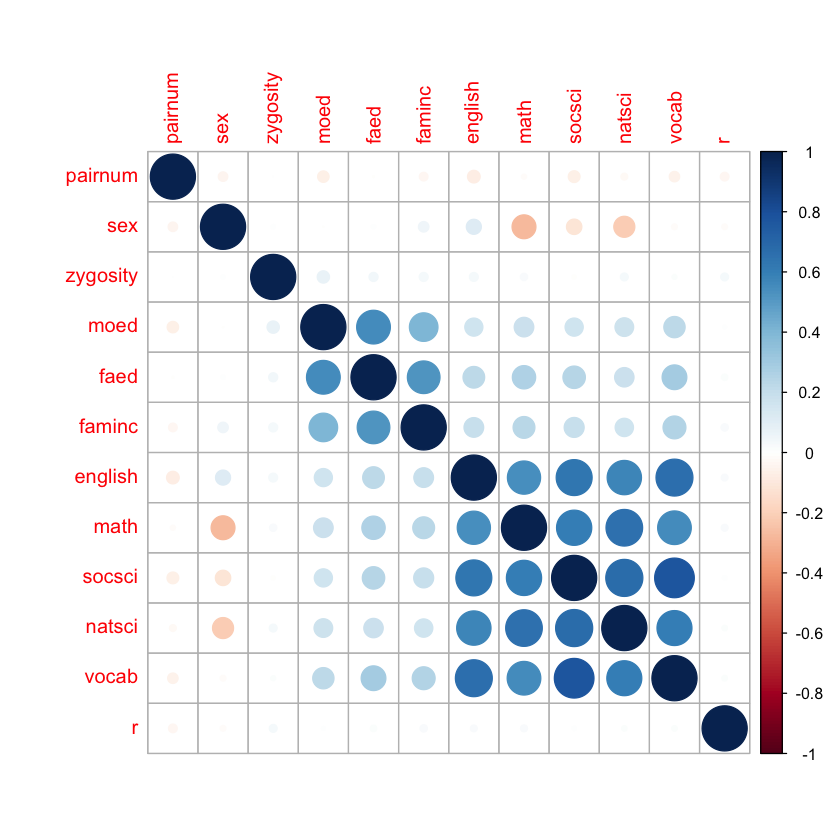

In [41]:
library(corrplot)
corrplot(mycors, method='circle')

All three numeric variables moed, faed, and faminc are correlated with vocab roughly equally, so I will include all 3 in my regression model. All of the other non-test variable sseem highly correlated with each other, so they are probably quite colinear. Moed, faed, and faminc also seem to be somewhat correlated with each other and may be quite colinear as well.

In [28]:
# create var for determining holdout data
mt$r = rbinom(nrow(mt),1, .5)

In [34]:
# determine the model parameters on only those rows where r = 1
library(MASS)
model_train1 = lm(vocab ~ as.factor(sex) + as.factor(zygosity) + moed + faed + faminc, r ==1, data=mt)
step = stepAIC(model_train1, direction='both')
step$anova

Start:  AIC=2336.43
vocab ~ as.factor(sex) + as.factor(zygosity) + moed + faed + 
    faminc

                      Df Sum of Sq   RSS    AIC
- as.factor(zygosity)  1      0.02 15357 2334.4
- as.factor(sex)       1     13.13 15370 2335.1
<none>                             15357 2336.4
- moed                 1     76.56 15434 2338.3
- faminc               1    112.71 15470 2340.1
- faed                 1    573.28 15930 2363.0

Step:  AIC=2334.43
vocab ~ as.factor(sex) + moed + faed + faminc

                      Df Sum of Sq   RSS    AIC
- as.factor(sex)       1     13.14 15370 2333.1
<none>                             15357 2334.4
- moed                 1     77.25 15434 2336.3
+ as.factor(zygosity)  1      0.02 15357 2336.4
- faminc               1    113.13 15470 2338.2
- faed                 1    575.03 15932 2361.1

Step:  AIC=2333.1
vocab ~ moed + faed + faminc

                      Df Sum of Sq   RSS    AIC
<none>                             15370 2333.1
+ as.factor(sex)      

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,774,15357.14,2336.433
- as.factor(zygosity),1,0.0210624,775,15357.16,2334.434
- as.factor(sex),1,13.1363289,776,15370.30,2333.101


Using the stepAIC, I found that zygosity and sex both increased the AIC and the optimal model will be one with these variables not included in the regression. Therefore the model I use will only include moed, faminc, and zygosity.

In [33]:
# train the model with only parameters of interest on rows where r==1
model_train_final = lm(vocab ~ moed + faed + faminc, r==1, data=mt)
summary(model_train_final)


Call:
lm(formula = vocab ~ moed + faed + faminc, data = mt, subset = r == 
    1)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9829  -2.9260  -0.1594   3.1883  13.6409 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.3603     0.5290  30.929  < 2e-16 ***
moed          0.3180     0.1626   1.956   0.0508 .  
faed          0.7554     0.1397   5.408 8.48e-08 ***
faminc        0.2895     0.1227   2.360   0.0185 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.451 on 776 degrees of freedom
  (73 observations deleted due to missingness)
Multiple R-squared:  0.1227,	Adjusted R-squared:  0.1193 
F-statistic: 36.18 on 3 and 776 DF,  p-value: < 2.2e-16


In [38]:
# now test on the holdout data and see how model performs
mt_holdout = subset(mt, r==0)
y = predict(model_train_final, mt_holdout)
model = lm(vocab ~ y, data=mt_holdout)
summary(model)


Call:
lm(formula = vocab ~ y, data = mt_holdout)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4867  -3.2286   0.0015   3.0426  12.5050 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.57161    2.05190   1.741   0.0822 .  
y            0.82719    0.09712   8.517   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.535 on 754 degrees of freedom
  (69 observations deleted due to missingness)
Multiple R-squared:  0.08777,	Adjusted R-squared:  0.08656 
F-statistic: 72.55 on 1 and 754 DF,  p-value: < 2.2e-16


First, I ran an AIC analysis to determine which variables should be included in model for predicting vocab scores. Then I trained a model on a training sample of the data (one half of the samples) using those variables and found that fathers education was highly significant, family income was significant, and mothers education was barely non-significant at p=0.0508. This model had an adjusted R-squared value of 0.1193, accounting for about 11% of the variance in vocab scores.

I then used this model to predict vocab scores in a hold-out testing data set (the other half of the samples). In this sample, the model was a highly significant predictor of vocab scores (P<2e-16) and had an adjusted R-squred value of 0.08656, accounting for about 9% of the variance in vocab scores.

A final note is that I simply eliminated any rows that had missing data from this analysis.